In [3]:
import sys
sys.path.append('./models')

from data_prep import load_and_prepare_data
from glm_model import train_glm, predict_glm
from gbm_model import train_gbm, predict_gbm
from evaluations import evaluate_rmse
from explainability import explain_gbm

In [4]:
# Load data
X_train, X_test, y_train, y_test = load_and_prepare_data()

In [5]:
# Train & evaluate GLM
glm_model = train_glm(X_train, y_train)
y_pred_glm = predict_glm(glm_model, X_test)
print("GLM RMSE:", evaluate_rmse(y_test, y_pred_glm))

GLM RMSE: 0.4357076788882181


/opt/conda/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [6]:
# Define the parameters to use
custom_params = {
    'num_leaves': 50,
    'learning_rate': 0.1,
    'feature_fraction': 0.8
}

# Train & evaluate the GBM
gbm_model = train_gbm(X_train, y_train, X_test, y_test, params=custom_params, num_boost_round=200)
y_pred_gbm = predict_gbm(gbm_model, X_test)
print("GBM RMSE:", evaluate_rmse(y_test, y_pred_gbm))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001657 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 828
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 4
[LightGBM] [Info] Start training from score 6.306060
GBM RMSE: 0.4770957075343504


/home/sagemaker-user/Motor Pricing Project/./models/explainability.py:7: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


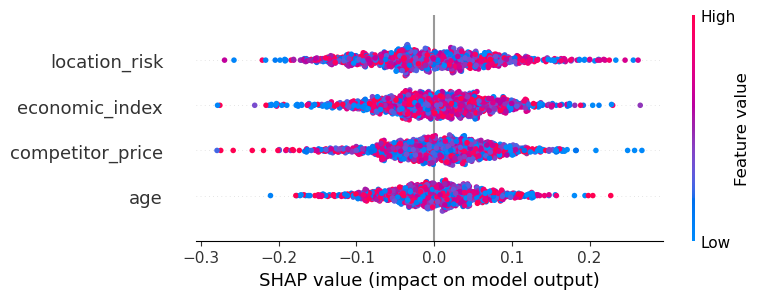

In [7]:
# Explain GBM model
explain_gbm(gbm_model, X_test)